# Group 43 — EDA: Funds of Funds (FoFs)

Course: IT462 — Exploratory Data Analysis  
Group: 43  
Members:
- Jenish Vasani (Leader) — ID-202301057  
- Prince Sojitra — ID-202301126  
- Siddharth Vala — ID-202301180

Dataset: Group43_Data.csv  
Notebook purpose: Compute annual returns, CAGR, rolling returns, volatility, Sharpe, max drawdown, capture ratios, return distributions, stability checks and seasonality.

# 1. Create Project and Mount Drive

In [168]:
from google.colab import drive
drive.mount('/content/drive')   # You will click a link, log in and paste the code

import os

# Project folder in your Google Drive
PROJECT = '/content/drive/MyDrive/EDA_Group43'

# Subfolders (you will store data, figures, and outputs here)
DATA_DIR = PROJECT + '/data'
FIG_DIR = PROJECT + '/figures'
OUT_DIR = PROJECT + '/outputs'

# Create folders if they don't exist
for folder in [PROJECT, DATA_DIR, FIG_DIR, OUT_DIR]:
    os.makedirs(folder, exist_ok=True)

print("Project setup complete!")
print("Folders created:")
print(PROJECT)
print(DATA_DIR)
print(FIG_DIR)
print(OUT_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project setup complete!
Folders created:
/content/drive/MyDrive/EDA_Group43
/content/drive/MyDrive/EDA_Group43/data
/content/drive/MyDrive/EDA_Group43/figures
/content/drive/MyDrive/EDA_Group43/outputs


# 2. Import all required Packages

In [169]:
import pandas as pd         # for dataframes, cleaning, pivot, CSV
import numpy as np          # for numerical calculations
import matplotlib.pyplot as plt   # for charts
import seaborn as sns       # for heatmaps & styling
import scipy.stats as stats # for distributions, skew, kurtosis, z-scores
import warnings             # to ignore unnecessary warnings
import os                   # for file paths and folder creation


warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

print("Packages imported successfully!")

Packages imported successfully!


In [170]:
# Check missing values before filling
na_before = df_pivot.isna().sum()

# Create a working copy
df_filled = df_pivot.copy()

# Forward fill then backward fill
df_filled = df_filled.ffill().bfill()

# Check after filling
na_after = df_filled.isna().sum()

print("Missing values before:\n", na_before)
print("\nMissing values after:\n", na_after)


Missing values before:
 Fund
ABSL Multi Asset Omni FoF Dir Plan Gr                         0
Axis Gold Fund Reg Gr                                         0
Bandhan Asset Allocation Fund Mod Reg Gr                      0
DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr    0
Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir          0
Franklin India Dynamic Asset Allocation Active FOF Dir Gr     0
HDFC Gold ETF FoF Dir                                         0
HSBC Multi Asset Active FOF Gr Dir                            0
ICICI Pru Bharat 22 FOF Dir Cum                               0
ICICI Pru Passive Strategy Fund FOF Dir Gr                    0
Kotak Multi Asset Omni FOF Dir Gr Dir                         0
Motilal Oswal Nasdaq 100 FOF Dir Gr                           0
Nippon India Gold Savings Dir Gr                              0
Sundaram Global Brand Theme Equity Active FOF Dir Gr          0
dtype: int64

Missing values after:
 Fund
ABSL Multi Asset Omni FoF Dir Pla

# 3. Upload File and Check basic info

In [171]:
# Path to CSV file in Google Drive
data_path = '/content/drive/MyDrive/EDA_Group43/data/Group43_Data.csv'

# Read the CSV
df = pd.read_csv(data_path)

# Show basic information
print("Dataset loaded successfully!")
print("Shape (rows, columns):", df.shape)

print("\nFirst few rows:")
display(df.head(10))

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

Dataset loaded successfully!
Shape (rows, columns): (47968, 4)

First few rows:


,Date,NAV,Fund,Fund_Type
0,31-10-2025 00:00,175.6564,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
1,30-10-2025 00:00,176.4640,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
2,29-10-2025 00:00,177.2552,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
3,28-10-2025 00:00,176.1939,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
4,27-10-2025 00:00,176.5302,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
5,24-10-2025 00:00,175.3092,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
6,23-10-2025 00:00,176.0531,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
7,20-10-2025 00:00,175.5119,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
8,17-10-2025 00:00,174.4499,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
9,16-10-2025 00:00,173.9398,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic



Column names:
['Date', 'NAV', 'Fund', 'Fund_Type']

Data types:
Date          object
NAV          float64
Fund          object
Fund_Type     object
dtype: object


# 4. Data Cleaning

## Date format and add missing date

In [172]:
# Remove the Date_dt column completely
df = df.drop(columns=['Date_dt'], errors='ignore')

# Ensure Date is formatted as dd/mm/yyyy
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%d/%m/%Y')

display(df.head(10))


,Date,NAV,Fund,Fund_Type
0,31/10/2025,175.6564,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
1,30/10/2025,176.4640,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
2,29/10/2025,177.2552,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
3,28/10/2025,176.1939,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
4,27/10/2025,176.5302,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
5,24/10/2025,175.3092,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
6,23/10/2025,176.0531,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
7,20/10/2025,175.5119,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
8,17/10/2025,174.4499,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic
9,16/10/2025,173.9398,ICICI Pru Passive Strategy Fund FOF Dir Gr,Domestic


## Check & Clean Fund Names and Fund Types

In [173]:
# 1) Clean whitespace and normalize text
df['Fund'] = df['Fund'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)
df['Fund_Type'] = df['Fund_Type'].astype(str).str.strip().replace({'nan': pd.NA})

# 2) Show unique funds count
print("Unique funds:", df['Fund'].nunique())

# 3) Display top 20 most common fund names
print("\nFund names:")
display(df['Fund'].value_counts().head(20))

# 4) Show unique Fund Types
print("\nFund Types (with counts):")
display(df['Fund_Type'].value_counts(dropna=False))

Unique funds: 20

Fund names:


,count
Fund,
Axis Gold Fund Reg Gr,2450
ICICI Pru Passive Strategy Fund FOF Dir Gr,2446
HDFC Gold ETF FoF Dir,2446
Nippon India Gold Savings Dir Gr,2446
Franklin India Aggressive Hybrid Fund Dir Gr,2445
Kotak Multi Asset Omni FOF Dir Gr Dir,2443
PGIM India Global Equity Opportunities FOF Dir Gr,2420
Sundaram Global Brand Theme Equity Active FOF Dir Gr,2409
Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,2406



Fund Types (with counts):


,count
Fund_Type,
Domestic,24241
Overseas,23727


## Filling missing NAV values

In [174]:
# Check missing values before filling
na_before = df_pivot.isna().sum()

# Create a working copy
df_filled = df_pivot.copy()

# ---- Filling Strategy ---- #
# Forward fill → best for time series
df_filled = df_filled.ffill()

# Backward fill → only if first values are missing
df_filled = df_filled.bfill()

# Check missing values after filling
na_after = df_filled.isna().sum()

# Build report
report = pd.DataFrame({
    'NA_Before': na_before,
    'NA_After': na_after,
    'Pct_Missing_Before': (na_before / len(df_filled)).round(4)
}).sort_values('Pct_Missing_Before', ascending=False)

print("📊 Missing Value Report: Before vs After Filling")
display(report.head(20))

# Funds still missing NAVs after both fills (rare)
still_missing = report[report['NA_After'] > 0]

print("\n⚠️ Funds still containing missing values after fill:")
display(still_missing)

# Overwrite df_pivot for next steps
df_pivot = df_filled.copy()

print("\n✅ Missing values fully handled. `df_pivot` is ready for next processing.")
display(df_pivot.head())

📊 Missing Value Report: Before vs After Filling


,NA_Before,NA_After,Pct_Missing_Before
Fund,,,
ABSL Multi Asset Omni FoF Dir Plan Gr,0,0,0.0
Axis Gold Fund Reg Gr,0,0,0.0
Bandhan Asset Allocation Fund Mod Reg Gr,0,0,0.0
DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,0,0,0.0
Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,0,0,0.0
Franklin India Dynamic Asset Allocation Active FOF Dir Gr,0,0,0.0
HDFC Gold ETF FoF Dir,0,0,0.0
HSBC Multi Asset Active FOF Gr Dir,0,0,0.0
ICICI Pru Bharat 22 FOF Dir Cum,0,0,0.0



⚠️ Funds still containing missing values after fill:


,NA_Before,NA_After,Pct_Missing_Before
Fund,,,



✅ Missing values fully handled. `df_pivot` is ready for next processing.


Fund,ABSL Multi Asset Omni FoF Dir Plan Gr,Axis Gold Fund Reg Gr,Bandhan Asset Allocation Fund Mod Reg Gr,DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,Franklin India Dynamic Asset Allocation Active FOF Dir Gr,HDFC Gold ETF FoF Dir,HSBC Multi Asset Active FOF Gr Dir,ICICI Pru Bharat 22 FOF Dir Cum,ICICI Pru Passive Strategy Fund FOF Dir Gr,Kotak Multi Asset Omni FOF Dir Gr Dir,Motilal Oswal Nasdaq 100 FOF Dir Gr,Nippon India Gold Savings Dir Gr,Sundaram Global Brand Theme Equity Active FOF Dir Gr
Date,,,,,,,,,,,,,,
2015-01-12,10.6753,8.3869,17.5054,8.3078,10.4384,64.3259,8.6717,12.5183,21.6001,47.5699,61.003,24.9805,11.2633,13.0725
2015-02-12,10.6636,8.3066,17.4907,8.3615,10.4972,64.2541,8.6442,12.4944,21.8331,47.6116,60.930,25.6270,11.2022,13.0099
2015-03-12,10.6442,8.3344,17.4738,8.4299,10.2330,64.0115,8.5757,12.4547,21.9698,47.6964,60.888,25.7821,11.1262,12.9699
2015-04-12,10.5962,8.3524,17.4289,8.5703,10.4850,63.7108,8.6587,12.3920,32.9581,47.8560,60.712,34.9622,11.2367,12.9728
2015-07-12,10.5945,8.3627,17.4522,8.5594,10.5386,63.7697,8.7344,12.3786,33.4644,47.0026,60.733,36.6767,11.4485,12.8046


## NAV Outlier Detection (IQR + Z-score + Visual Boxplots)

📌 IQR-based extreme NAV outliers (sample):


,count,min_outlier,max_outlier
DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,47.0,40.2412,51.6383
ICICI Pru Passive Strategy Fund FOF Dir Gr,30.0,1085.6270,1140.4960



📌 Z-score outlier counts (sample):


,0
Axis Gold Fund Reg Gr,1
DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,38
HDFC Gold ETF FoF Dir,1
ICICI Pru Passive Strategy Fund FOF Dir Gr,30
Nippon India Gold Savings Dir Gr,1


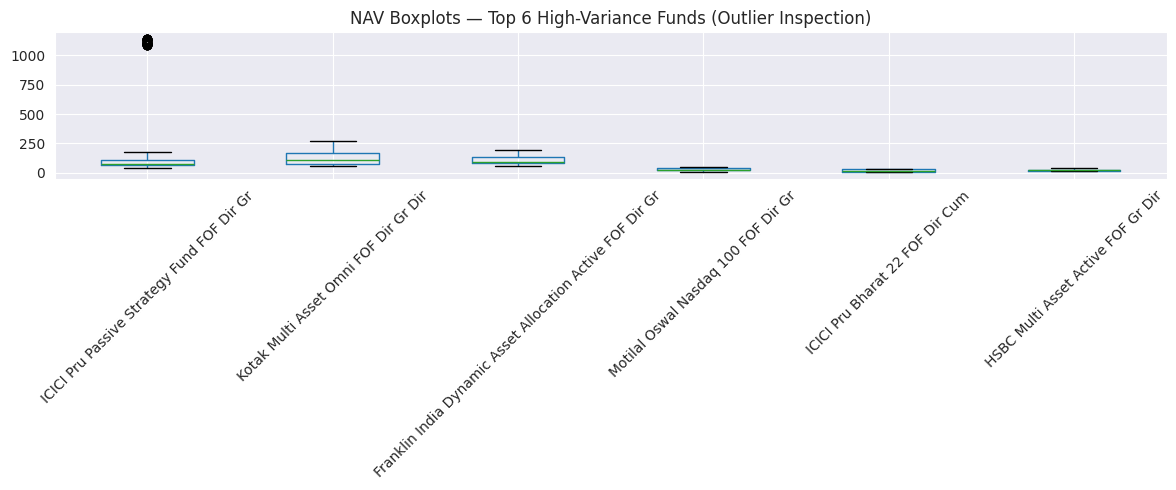

In [175]:
# IQR-based outliers (per fund)
iqr_outliers = {}

for col in df_pivot.columns:
    series = df_pivot[col].dropna()
    if len(series) < 10:
        continue

    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    # Conservative bounds (3*IQR)
    lower = q1 - 3 * iqr
    upper = q3 + 3 * iqr

    outs = series[(series < lower) | (series > upper)]

    if not outs.empty:
        iqr_outliers[col] = {
            'count': len(outs),
            'min_outlier': float(outs.min()),
            'max_outlier': float(outs.max())
        }

print("📌 IQR-based extreme NAV outliers (sample):")
display(pd.DataFrame(iqr_outliers).T.head(10))


# Z-score outliers (very sensitive)
zscore_outliers = {}

for col in df_pivot.columns:
    series = df_pivot[col].dropna()
    if len(series) < 10:
        continue

    z = np.abs(stats.zscore(series))
    outs = series[z > 4]   # z > 4 considered extreme

    if not outs.empty:
        zscore_outliers[col] = len(outs)

print("\n📌 Z-score outlier counts (sample):")
display(pd.DataFrame.from_dict(zscore_outliers, orient='index').head(10))


# Visual inspection: Boxplots of top 6 volatile funds
top_variance_funds = df_pivot.var().sort_values(ascending=False).head(6).index.tolist()

plt.figure(figsize=(12, 5))
df_pivot[top_variance_funds].boxplot()
plt.title("NAV Boxplots — Top 6 High-Variance Funds (Outlier Inspection)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Date Frequency

In [176]:
# Ensure index is datetime (df_pivot index should already be datetime)
df_pivot.index = pd.to_datetime(df_pivot.index, errors='coerce')

# Sort just to be safe
df_pivot = df_pivot.sort_index()

# 1) Calculate differences between consecutive dates
date_diffs = df_pivot.index.to_series().diff().dropna()

print("Unique time gaps between dates:")
display(date_diffs.value_counts().head(10))

# 2) pandas infer frequency
inferred = pd.infer_freq(df_pivot.index)
print("\nInferred frequency from pandas:", inferred)

# 3) Simple rule-based suggestion
most_common_gap = date_diffs.mode()[0]

if most_common_gap == pd.Timedelta(days=1):
    suggestion = "Daily calendar data → periods_per_year = 365"
elif most_common_gap == pd.Timedelta(days=2):
    suggestion = "Daily trading pattern (weekends missing) → periods_per_year = 252"
elif most_common_gap == pd.Timedelta(days=7):
    suggestion = "Weekly data → periods_per_year = 52"
elif most_common_gap >= pd.Timedelta(days=28):
    suggestion = "Monthly data → periods_per_year = 12"
else:
    suggestion = "Irregular frequency → inspect your data"

print("\nSuggested frequency interpretation:")
print("➡", suggestion)

Unique time gaps between dates:


,count
Date,
1 days,524
2 days,253
3 days,57
20 days,47
21 days,35
19 days,17
22 days,7
18 days,6
31 days,5



Inferred frequency from pandas: None

Suggested frequency interpretation:
➡ Daily calendar data → periods_per_year = 365


# 5. Feature Enineering

In [177]:
# choose periods_per_year according to Cell G result (252 daily trading days typical)
periods_per_year = 252

# 1. Simple percent returns (period-to-period)
returns = df_pivot.pct_change().dropna(how='all')

# 2. Log returns (often used for statistical operations)
import numpy as np
log_returns = np.log(df_pivot / df_pivot.shift(1)).dropna(how='all')

# 3. Cumulative returns (index growth from first available date)
cum_returns = (1 + returns).cumprod() - 1  # relative to first day

# 4. Optional: total growth (final NAV / initial NAV - 1)
total_growth = df_pivot.apply(lambda s: s.dropna().iloc[-1] / s.dropna().iloc[0] - 1 if s.dropna().shape[0]>1 else np.nan)

# quick displays
display(returns.head())
display(log_returns.head())
display(cum_returns.iloc[-5:].head())  # recent cumulative


Fund,ABSL Multi Asset Omni FoF Dir Plan Gr,Axis Gold Fund Reg Gr,Bandhan Asset Allocation Fund Mod Reg Gr,DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,Franklin India Dynamic Asset Allocation Active FOF Dir Gr,HDFC Gold ETF FoF Dir,HSBC Multi Asset Active FOF Gr Dir,ICICI Pru Bharat 22 FOF Dir Cum,ICICI Pru Passive Strategy Fund FOF Dir Gr,Kotak Multi Asset Omni FOF Dir Gr Dir,Motilal Oswal Nasdaq 100 FOF Dir Gr,Nippon India Gold Savings Dir Gr,Sundaram Global Brand Theme Equity Active FOF Dir Gr
Date,,,,,,,,,,,,,,
2015-02-12,-0.001096,-0.009574,-0.000840,0.006464,0.005633,-0.001116,-0.003171,-0.001909,0.010787,0.000877,-0.001197,0.025880,-0.005425,-0.004789
2015-03-12,-0.001819,0.003347,-0.000966,0.008180,-0.025169,-0.003776,-0.007924,-0.003177,0.006261,0.001781,-0.000689,0.006052,-0.006784,-0.003075
2015-04-12,-0.004509,0.002160,-0.002570,0.016655,0.024626,-0.004698,0.009679,-0.005034,0.500155,0.003346,-0.002891,0.356065,0.009932,0.000224
2015-07-12,-0.000160,0.001233,0.001337,-0.001272,0.005112,0.000924,0.008743,-0.001081,0.015362,-0.017833,0.000346,0.049039,0.018849,-0.012966
2015-08-12,-0.003936,-0.004520,-0.003719,-0.029243,-0.017887,-0.004189,-0.006938,-0.004597,-0.007133,-0.002936,-0.002371,0.016613,-0.014936,-0.013089


Fund,ABSL Multi Asset Omni FoF Dir Plan Gr,Axis Gold Fund Reg Gr,Bandhan Asset Allocation Fund Mod Reg Gr,DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,Franklin India Dynamic Asset Allocation Active FOF Dir Gr,HDFC Gold ETF FoF Dir,HSBC Multi Asset Active FOF Gr Dir,ICICI Pru Bharat 22 FOF Dir Cum,ICICI Pru Passive Strategy Fund FOF Dir Gr,Kotak Multi Asset Omni FOF Dir Gr Dir,Motilal Oswal Nasdaq 100 FOF Dir Gr,Nippon India Gold Savings Dir Gr,Sundaram Global Brand Theme Equity Active FOF Dir Gr
Date,,,,,,,,,,,,,,
2015-02-12,-0.001097,-0.009621,-0.000840,0.006443,0.005617,-0.001117,-0.003176,-0.001911,0.010729,0.000876,-0.001197,0.025551,-0.005439,-0.004800
2015-03-12,-0.001821,0.003341,-0.000967,0.008147,-0.025491,-0.003783,-0.007956,-0.003182,0.006242,0.001779,-0.000690,0.006034,-0.006808,-0.003079
2015-04-12,-0.004520,0.002157,-0.002573,0.016518,0.024328,-0.004709,0.009632,-0.005047,0.405568,0.003341,-0.002895,0.304587,0.009883,0.000224
2015-07-12,-0.000160,0.001232,0.001336,-0.001273,0.005099,0.000924,0.008705,-0.001082,0.015245,-0.017994,0.000346,0.047874,0.018674,-0.013050
2015-08-12,-0.003944,-0.004530,-0.003726,-0.029679,-0.018049,-0.004197,-0.006962,-0.004607,-0.007159,-0.002940,-0.002374,0.016476,-0.015049,-0.013175


Fund,ABSL Multi Asset Omni FoF Dir Plan Gr,Axis Gold Fund Reg Gr,Bandhan Asset Allocation Fund Mod Reg Gr,DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,Franklin India Dynamic Asset Allocation Active FOF Dir Gr,HDFC Gold ETF FoF Dir,HSBC Multi Asset Active FOF Gr Dir,ICICI Pru Bharat 22 FOF Dir Cum,ICICI Pru Passive Strategy Fund FOF Dir Gr,Kotak Multi Asset Omni FOF Dir Gr Dir,Motilal Oswal Nasdaq 100 FOF Dir Gr,Nippon India Gold Savings Dir Gr,Sundaram Global Brand Theme Equity Active FOF Dir Gr
Date,,,,,,,,,,,,,,
NaT,0.311092,0.181140,0.254184,0.332266,1.729221,0.342733,0.216613,0.321953,-0.510562,0.387861,0.325951,-0.619755,0.207666,0.215758
NaT,0.412757,0.453505,0.338073,0.809829,1.729221,0.435943,0.485925,0.425649,-0.528548,0.487060,0.471895,-0.472725,0.484236,0.436168
NaT,0.717732,0.843804,0.462143,1.390007,1.729221,0.338596,0.903191,0.669452,-0.565974,0.651956,0.848319,-0.201865,0.885717,0.752213
NaT,1.059221,0.757085,0.683938,1.189846,1.729221,0.842773,0.806266,1.046700,-0.393424,1.159300,1.328443,0.029479,0.786652,1.096776
NaT,2.095014,1.700664,1.235939,1.557921,1.729221,1.786434,1.789488,1.920828,0.457373,21.984618,2.893350,0.818158,1.749017,1.695812


# 6. Statistical Summaries

In [178]:
# --- Statistical summaries
stats_summary = returns.describe().T  # mean, std, min, max, quartiles
stats_summary['skew'] = returns.skew()
stats_summary['kurtosis'] = returns.kurtosis()
# optional: add annualized mean return
stats_summary['ann_mean'] = stats_summary['mean'] * periods_per_year
display(stats_summary.sort_values('ann_mean', ascending=False).head(20))
# Save
stats_summary.to_csv('/content/drive/MyDrive/EDA_Group43/outputs/statistics_summary.csv')


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,ann_mean
Fund,,,,,,,,,,,
ICICI Pru Passive Strategy Fund FOF Dir Gr,2453.0,0.134104,0.828115,-0.958594,-0.009921,0.046365,0.176016,10.165744,7.612071,70.697189,33.794310
ICICI Pru Bharat 22 FOF Dir Cum,2453.0,0.094403,0.468262,-0.790987,-0.032742,0.000000,0.163495,3.840532,1.803979,6.868234,23.789598
Motilal Oswal Nasdaq 100 FOF Dir Gr,2453.0,0.078935,0.394863,-0.816192,-0.035807,0.015670,0.269592,3.678091,1.654777,12.938762,19.891598
Kotak Multi Asset Omni FOF Dir Gr Dir,2453.0,0.068765,0.316147,-0.772536,0.005058,0.054522,0.179751,2.585871,-0.325615,3.729854,17.328820
DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,2453.0,0.058694,0.357102,-0.817853,-0.104123,0.000171,0.184006,3.525227,1.652247,9.507794,14.790888
ABSL Multi Asset Omni FoF Dir Plan Gr,2453.0,0.050133,0.278230,-0.712834,-0.004527,0.033872,0.156738,1.910289,-0.336527,3.889634,12.633440
HDFC Gold ETF FoF Dir,2453.0,0.048873,0.273611,-0.771339,-0.019557,0.038415,0.160401,1.064180,-0.573343,1.901457,12.316076
Nippon India Gold Savings Dir Gr,2453.0,0.047770,0.270957,-0.769396,-0.020339,0.036881,0.157089,1.067849,-0.576214,1.909885,12.038128
Axis Gold Fund Reg Gr,2453.0,0.047090,0.269871,-0.766292,-0.020503,0.037859,0.159759,1.046757,-0.566193,1.839327,11.866772


# 7. Risk Metrices

In [179]:
# Cell I — Risk & Performance Metric Functions

# CAGR — Compounded Annual Growth Rate
def cagr(nav_series):
    nav = nav_series.dropna()
    if len(nav) < 2:
        return np.nan

    start = nav.iloc[0]
    end = nav.iloc[-1]

    days = (nav.index[-1] - nav.index[0]).days
    years = days / 365.25

    if years <= 0:
        return np.nan

    return (end / start) ** (1/years) - 1


# Annualized Volatility
def annualized_vol(ret_series, periods=252):
    return ret_series.std() * np.sqrt(periods)


# Sharpe-like Ratio (no risk-free rate unless added)
def sharpe_like(ret_series, rf=0, periods=252):
    ann_ret = ret_series.mean() * periods
    ann_vol = ret_series.std() * np.sqrt(periods)
    if ann_vol == 0:
        return np.nan
    return (ann_ret - rf) / ann_vol


# Max Drawdown
def max_drawdown(nav_series):
    nav = nav_series.dropna()
    roll_max = nav.cummax()
    dd = nav / roll_max - 1
    return dd.min()


# Calmar Ratio
def calmar_ratio(nav_series):
    c = cagr(nav_series)
    md = max_drawdown(nav_series)
    if md == 0:
        return np.nan
    return c / abs(md)


# Downside standard deviation
def downside_std(ret_series, target=0, periods=252):
    downside = ret_series[ret_series < target]
    return downside.std() * np.sqrt(periods)


# Sortino Ratio
def sortino_ratio(ret_series, target=0, periods=252):
    ann_ret = ret_series.mean() * periods
    d_std = downside_std(ret_series, target, periods)
    if d_std == 0:
        return np.nan
    return (ann_ret - target) / d_std


print("All risk & performance functions loaded successfully!")

# --- Cell J: Full Risk Metrics Table + Risk Level Classification ---

periods_per_year = 252   # adjust if needed based on date frequency

risk_rows = []

for fund in df_pivot.columns:
    nav = df_pivot[fund].dropna()
    r = returns[fund].dropna()

    if len(nav) < 20:  # skip very short series
        continue

    c = cagr(nav)
    vol = annualized_vol(r, periods_per_year)
    sh = sharpe_like(r, 0.0, periods_per_year)
    sor = sortino_ratio(r, 0.0, periods_per_year)
    dd = max_drawdown(nav)
    cal = calmar_ratio(nav)

    # ------- RISK LEVEL CLASSIFICATION -------
    # Based on annualized volatility (vol)
    if vol < 0.10:
        risk_level = "Low"
    elif vol < 0.18:
        risk_level = "Moderate"
    else:
        risk_level = "High"
    # -----------------------------------------

    risk_rows.append({
        'Fund': fund,
        'Observations': len(nav),
        'CAGR': c,
        'Annualized_Vol': vol,
        'Sharpe_like': sh,
        'Sortino': sor,
        'Max_Drawdown': dd,
        'Calmar': cal,
        'Risk_Level': risk_level
    })

risk_df = pd.DataFrame(risk_rows).set_index('Fund')

# Sort by CAGR for top performers
display(risk_df.sort_values('CAGR', ascending=False).head(20))

# Save output
risk_df.to_csv("/content/drive/MyDrive/EDA_Group43/outputs/risk_metrics_classified.csv")

print("\nRisk Metrics + Classification completed successfully!")



All risk & performance functions loaded successfully!


,Observations,CAGR,Annualized_Vol,Sharpe_like,Sortino,Max_Drawdown,Calmar,Risk_Level
Fund,,,,,,,,
ABSL Multi Asset Omni FoF Dir Plan Gr,2454,NaN,4.416765,2.860338,2.875055,-0.740684,NaN,High
Axis Gold Fund Reg Gr,2454,NaN,4.284076,2.769972,3.000950,-0.784842,NaN,High
Bandhan Asset Allocation Fund Mod Reg Gr,2454,NaN,3.152410,2.003825,1.808499,-0.591274,NaN,High
DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,2454,NaN,5.668816,2.609167,4.905819,-0.847319,NaN,High
Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,2454,NaN,3.882195,2.383690,2.722212,-0.710627,NaN,High
Franklin India Dynamic Asset Allocation Active FOF Dir Gr,2454,NaN,4.350460,2.625534,2.842263,-0.682682,NaN,High
HDFC Gold ETF FoF Dir,2454,NaN,4.343434,2.835562,3.026965,-0.789853,NaN,High
HSBC Multi Asset Active FOF Gr Dir,2454,NaN,4.219653,2.682847,2.772659,-0.722347,NaN,High
ICICI Pru Bharat 22 FOF Dir Cum,2454,NaN,7.433426,3.200355,5.572034,-0.815420,NaN,High



Risk Metrics + Classification completed successfully!


# 8. Rolling Metrices

## Rolling Metrics (1-year Rolling Return, Volatility, Sharpe)

In [180]:
# CELL K — Rolling Metrics (1-year Rolling Return, Volatility, Sharpe)

# 1-year window based on your frequency (252 for daily trading NAV)
rolling_window = periods_per_year

# ---- Rolling Annualized Return ----
# (1 + returns).rolling().apply(prod) gives multi-period compounding
rolling_ann_return = (
    (1 + returns).rolling(rolling_window).apply(np.prod, raw=True) ** (periods_per_year / rolling_window)
) - 1

# ---- Rolling Volatility ----
rolling_vol = returns.rolling(rolling_window).std() * np.sqrt(periods_per_year)

# ---- Rolling Sharpe-like ----
rolling_sharpe = (returns.rolling(rolling_window).mean() * periods_per_year) / rolling_vol

print("Rolling Metrics created successfully!")
display(rolling_ann_return.tail())
display(rolling_vol.tail())
display(rolling_sharpe.tail())


Rolling Metrics created successfully!


Fund,ABSL Multi Asset Omni FoF Dir Plan Gr,Axis Gold Fund Reg Gr,Bandhan Asset Allocation Fund Mod Reg Gr,DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,Franklin India Dynamic Asset Allocation Active FOF Dir Gr,HDFC Gold ETF FoF Dir,HSBC Multi Asset Active FOF Gr Dir,ICICI Pru Bharat 22 FOF Dir Cum,ICICI Pru Passive Strategy Fund FOF Dir Gr,Kotak Multi Asset Omni FOF Dir Gr Dir,Motilal Oswal Nasdaq 100 FOF Dir Gr,Nippon India Gold Savings Dir Gr,Sundaram Global Brand Theme Equity Active FOF Dir Gr
Date,,,,,,,,,,,,,,
NaT,0.061057,0.085814,0.067134,-0.111017,1.583798,0.131127,0.089391,0.057344,-0.670104,0.106633,0.084044,-0.748082,0.076225,0.027941
NaT,0.075437,0.259508,0.082677,0.296080,1.428104,0.124595,0.258374,0.081540,-0.682228,0.113472,0.150579,-0.650672,0.262195,0.094386
NaT,0.265584,0.464112,0.124509,0.492629,1.494785,-0.038196,0.469443,0.204612,-0.186156,0.145612,0.330984,0.765204,0.459793,0.321788
NaT,0.067707,0.018129,0.069811,-0.033588,0.718682,0.128391,0.015844,0.096986,0.107831,0.102632,0.094609,0.137966,0.015661,0.037295
NaT,0.586679,0.456811,0.417161,0.330181,0.967098,0.557784,0.459808,0.584117,1.317473,10.753332,0.755714,1.361955,0.458551,0.577188


Fund,ABSL Multi Asset Omni FoF Dir Plan Gr,Axis Gold Fund Reg Gr,Bandhan Asset Allocation Fund Mod Reg Gr,DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,Franklin India Dynamic Asset Allocation Active FOF Dir Gr,HDFC Gold ETF FoF Dir,HSBC Multi Asset Active FOF Gr Dir,ICICI Pru Bharat 22 FOF Dir Cum,ICICI Pru Passive Strategy Fund FOF Dir Gr,Kotak Multi Asset Omni FOF Dir Gr Dir,Motilal Oswal Nasdaq 100 FOF Dir Gr,Nippon India Gold Savings Dir Gr,Sundaram Global Brand Theme Equity Active FOF Dir Gr
Date,,,,,,,,,,,,,,
NaT,5.456685,5.440125,3.920408,6.330033,4.759559,5.288569,5.495563,5.228942,7.906115,15.409792,6.480003,6.487601,5.443058,5.125662
NaT,5.456668,5.442230,3.920486,6.334332,4.759926,5.288564,5.497352,5.228931,7.906744,15.409743,6.479694,6.493369,5.445083,5.126778
NaT,5.458265,5.445523,3.920831,6.338489,4.759517,5.290257,5.500997,5.229900,7.872646,15.409562,6.481304,6.456953,5.448442,5.128775
NaT,5.448737,5.439132,3.918691,6.331880,4.743532,5.298247,5.494719,5.224885,7.877031,15.409070,6.469223,6.396503,5.442594,5.109822
NaT,5.464992,5.458474,3.929127,6.328161,4.740303,5.316756,5.514384,5.236511,7.980720,18.079956,6.493333,6.426173,5.462112,5.109747


Fund,ABSL Multi Asset Omni FoF Dir Plan Gr,Axis Gold Fund Reg Gr,Bandhan Asset Allocation Fund Mod Reg Gr,DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,Franklin India Dynamic Asset Allocation Active FOF Dir Gr,HDFC Gold ETF FoF Dir,HSBC Multi Asset Active FOF Gr Dir,ICICI Pru Bharat 22 FOF Dir Cum,ICICI Pru Passive Strategy Fund FOF Dir Gr,Kotak Multi Asset Omni FOF Dir Gr Dir,Motilal Oswal Nasdaq 100 FOF Dir Gr,Nippon India Gold Savings Dir Gr,Sundaram Global Brand Theme Equity Active FOF Dir Gr
Date,,,,,,,,,,,,,,
NaT,3.537502,3.620270,2.514691,3.213317,3.139442,3.237868,3.636601,3.309958,3.715715,3.015411,4.237957,3.733804,3.587241,3.236379
NaT,3.540153,3.650052,2.518547,3.278498,3.125729,3.236697,3.665252,3.314579,3.710771,3.015848,4.248066,3.790036,3.619163,3.249664
NaT,3.572586,3.680399,2.528693,3.303782,3.131613,3.205837,3.696268,3.336841,3.798122,3.017906,4.273272,3.999448,3.648496,3.289325
NaT,3.538058,3.607976,2.515047,3.228438,3.046970,3.239361,3.623365,3.317023,3.843091,3.014696,4.239201,3.926096,3.576293,3.237297
NaT,3.617489,3.679983,2.591197,3.280814,3.075686,3.306478,3.695616,3.393463,3.950299,3.102857,4.320424,4.050389,3.649050,3.323476


## Rolling Metric Charts (Choose Top 3 Funds)

<Figure size 1400x500 with 0 Axes>

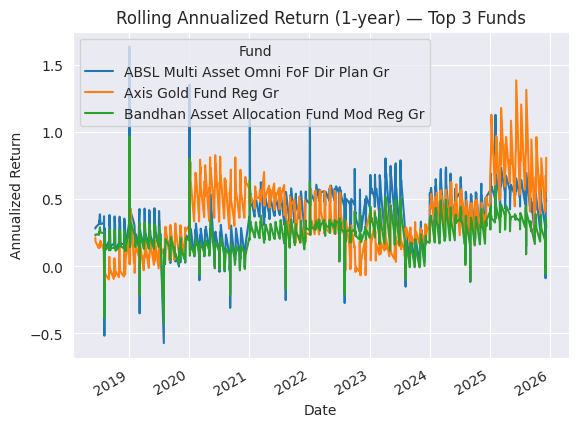

<Figure size 1400x500 with 0 Axes>

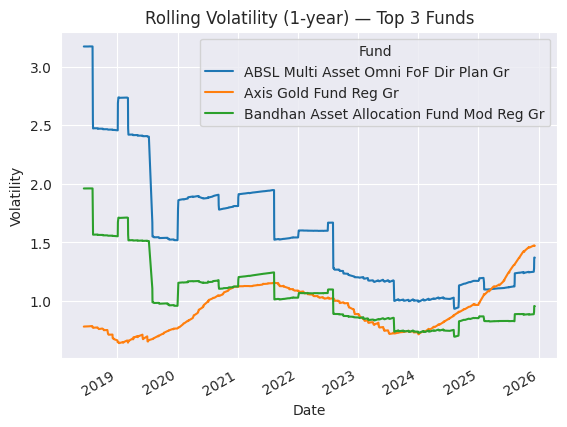

<Figure size 1400x500 with 0 Axes>

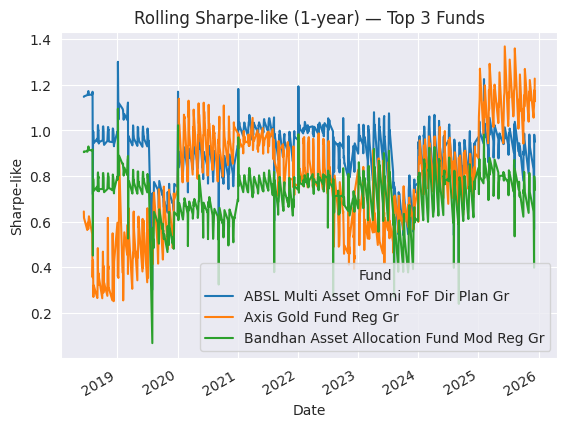

In [181]:
# CELL L — Rolling charts (for top 3 funds by CAGR)

# pick top 3 funds by performance
top_funds = risk_df.sort_values("CAGR", ascending=False).head(3).index.tolist()

import matplotlib.pyplot as plt

# --- Rolling Return Chart ---
plt.figure(figsize=(14,5))
rolling_ann_return[top_funds].plot()
plt.title("Rolling Annualized Return (1-year) — Top 3 Funds")
plt.ylabel("Annualized Return")
plt.show()

# --- Rolling Volatility Chart ---
plt.figure(figsize=(14,5))
rolling_vol[top_funds].plot()
plt.title("Rolling Volatility (1-year) — Top 3 Funds")
plt.ylabel("Volatility")
plt.show()

# --- Rolling Sharpe Chart ---
plt.figure(figsize=(14,5))
rolling_sharpe[top_funds].plot()
plt.title("Rolling Sharpe-like (1-year) — Top 3 Funds")
plt.ylabel("Sharpe-like")
plt.show()


## Stability Ratio

In [182]:
# Requirements: df_pivot and returns should exist. rolling_sharpe will be computed if missing.

# --- 0) Safety: ensure returns exists
if 'returns' not in globals():
    returns = df_pivot.pct_change().dropna(how='all')

# --- 1) Ensure rolling_sharpe exists; compute fallback if needed
if 'rolling_sharpe' not in globals():
    # choose sensible defaults if not present
    periods_per_year = globals().get('periods_per_year', 252)
    rolling_window = globals().get('rolling_window', periods_per_year)
    # compute rolling metrics
    rolling_vol = returns.rolling(rolling_window).std() * np.sqrt(periods_per_year)
    rolling_sharpe = (returns.rolling(rolling_window).mean() * periods_per_year) / rolling_vol

# --- 2) Build stability table (mean, std, ratio)
rows = []
min_obs_for_stability = 30  # require at least this many rolling points

for fund in df_pivot.columns:
    rs = rolling_sharpe[fund].dropna()
    if len(rs) < min_obs_for_stability:
        # Not enough rolling history to estimate stability reliably
        rows.append({
            'Fund': fund,
            'Mean_Rolling_Sharpe': np.nan,
            'Std_Rolling_Sharpe': np.nan,
            'Stability_Ratio': np.nan,
            'Stability_Score_0_10': np.nan,
            'Stability_Label': 'Insufficient Data'
        })
        continue

    mean_rs = float(rs.mean())
    std_rs = float(rs.std(ddof=0))  # population std to keep ratio scale
    stability_ratio = mean_rs / std_rs if std_rs != 0 else np.nan

    rows.append({
        'Fund': fund,
        'Mean_Rolling_Sharpe': mean_rs,
        'Std_Rolling_Sharpe': std_rs,
        'Stability_Ratio': stability_ratio
    })

stab_df = pd.DataFrame(rows).set_index('Fund')

# --- 3) Convert Stability_Ratio to a 0-10 score using percentile ranking
# Use rank(pct) so it's robust to extreme outliers; higher ratio -> higher percentile -> higher score
stab_df['Stability_RankPct'] = stab_df['Stability_Ratio'].rank(pct=True, na_option='bottom')

# Base score 0-10
stab_df['Stability_Score_0_10'] = (stab_df['Stability_RankPct'] * 10).round(2)

# --- 4) Penalize funds with negative mean rolling sharpe (they are unstable even if low std)
# Multiply score by 0.6 if mean rolling sharpe < 0 (you can change factor)
penalty_factor = 0.6
mask_neg_mean = stab_df['Mean_Rolling_Sharpe'] < 0
stab_df.loc[mask_neg_mean, 'Stability_Score_0_10'] = (stab_df.loc[mask_neg_mean, 'Stability_Score_0_10'] * penalty_factor).round(2)

# --- 5) Fill NaN scores for 'Insufficient Data' as NaN (already set)
# --- 6) Labels: Stable / Moderately Stable / Unstable / Insufficient Data
def label_from_score(x):
    if pd.isna(x):
        return 'Insufficient Data'
    if x >= 7.5:
        return 'Stable'
    if x >= 4.0:
        return 'Moderately Stable'
    return 'Unstable'

stab_df['Stability_Label'] = stab_df['Stability_Score_0_10'].apply(label_from_score)

# --- 7) Tidy and save
stab_df = stab_df[['Mean_Rolling_Sharpe','Std_Rolling_Sharpe','Stability_Ratio','Stability_Score_0_10','Stability_Label']]
stab_df = stab_df.sort_values(by='Stability_Score_0_10', ascending=False)

display(stab_df.head(30))

# Save to disk for your report
out_path = '/content/drive/MyDrive/EDA_Group43/outputs/stability_scores.csv'
stab_df.to_csv(out_path)
print("Stability table saved to:", out_path)

# --- 8) Summary counts
print("\nCounts by Stability_Label:")
display(stab_df['Stability_Label'].value_counts(dropna=False))


,Mean_Rolling_Sharpe,Std_Rolling_Sharpe,Stability_Ratio,Stability_Score_0_10,Stability_Label
Fund,,,,,
DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr,2.527563,0.736802,3.430449,10.00,Stable
ICICI Pru Bharat 22 FOF Dir Cum,3.075499,1.094014,2.811205,9.29,Stable
Motilal Oswal Nasdaq 100 FOF Dir Gr,3.096306,1.179935,2.624132,8.57,Stable
ICICI Pru Passive Strategy Fund FOF Dir Gr,2.517130,1.015047,2.479817,7.86,Stable
Franklin India Dynamic Asset Allocation Active FOF Dir Gr,2.417084,1.112766,2.172139,7.14,Moderately Stable
Bandhan Asset Allocation Fund Mod Reg Gr,1.827262,0.843719,2.165725,6.43,Moderately Stable
Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir,2.190457,1.018219,2.151263,5.71,Moderately Stable
Sundaram Global Brand Theme Equity Active FOF Dir Gr,2.409855,1.143811,2.106864,5.00,Moderately Stable
HSBC Multi Asset Active FOF Gr Dir,2.457117,1.173322,2.094154,4.29,Moderately Stable


Stability table saved to: /content/drive/MyDrive/EDA_Group43/outputs/stability_scores.csv

Counts by Stability_Label:


,count
Stability_Label,
Moderately Stable,5
Unstable,5
Stable,4


# 9. Charts

## Correlation Heatmap (Returns)

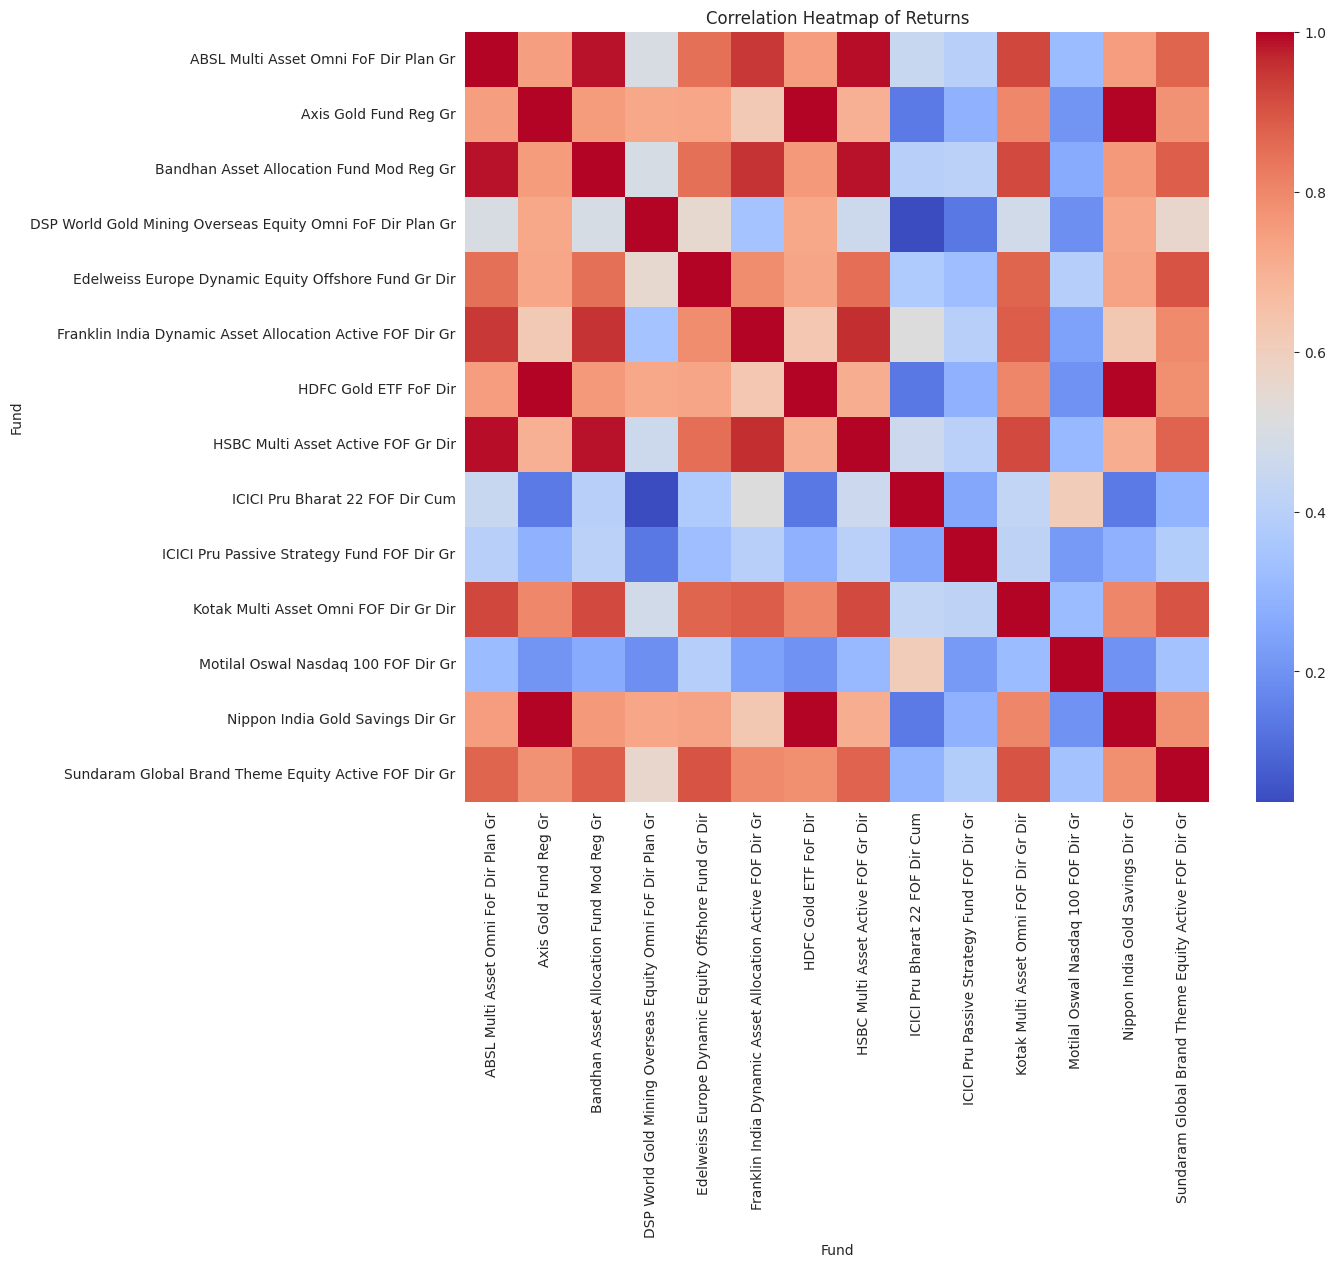

In [183]:
plt.figure(figsize=(12,10))
sns.heatmap(returns.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Returns")
plt.show()

## RETURN DISTRIBUTION + KDE (Histogram)

Showing distribution for: ABSL Multi Asset Omni FoF Dir Plan Gr


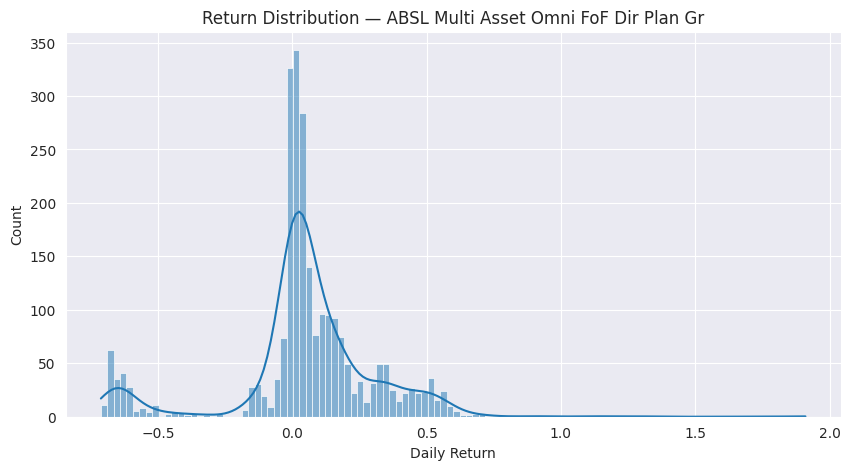

In [184]:
fund = risk_df.sort_values("CAGR", ascending=False).index[0]   # top performing fund
print("Showing distribution for:", fund)

plt.figure(figsize=(10,5))
sns.histplot(returns[fund].dropna(), kde=True)
plt.title(f"Return Distribution — {fund}")
plt.xlabel("Daily Return")
plt.show()

## DRAWDOWN CHART

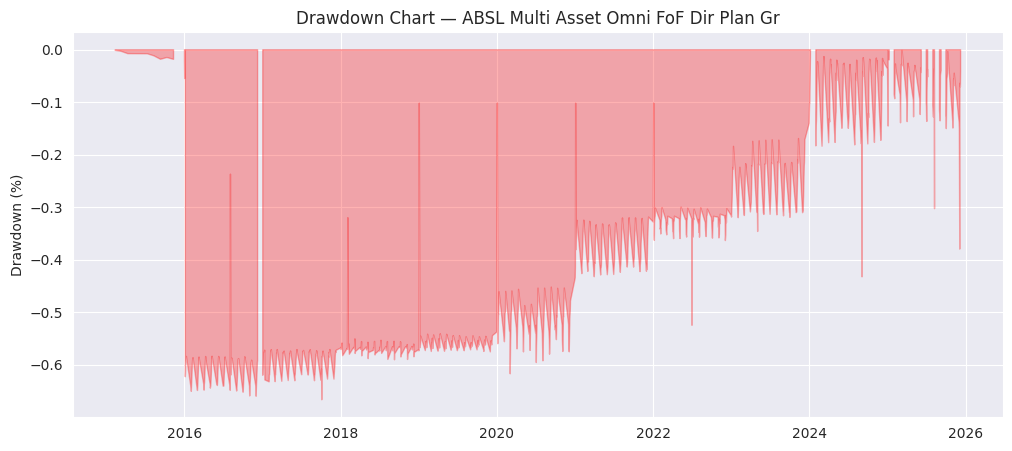

In [185]:
def drawdown_series(nav):
    return nav / nav.cummax() - 1

fund = risk_df.sort_values("CAGR", ascending=False).index[0]  # best CAGR fund

dd = drawdown_series(df_pivot[fund].dropna())

plt.figure(figsize=(12,5))
plt.fill_between(dd.index, dd, 0, where=(dd < 0), color='red', alpha=0.3)
plt.title(f"Drawdown Chart — {fund}")
plt.ylabel("Drawdown (%)")
plt.show()

## MULTI-FUND DRAWDOWN COMPARISON

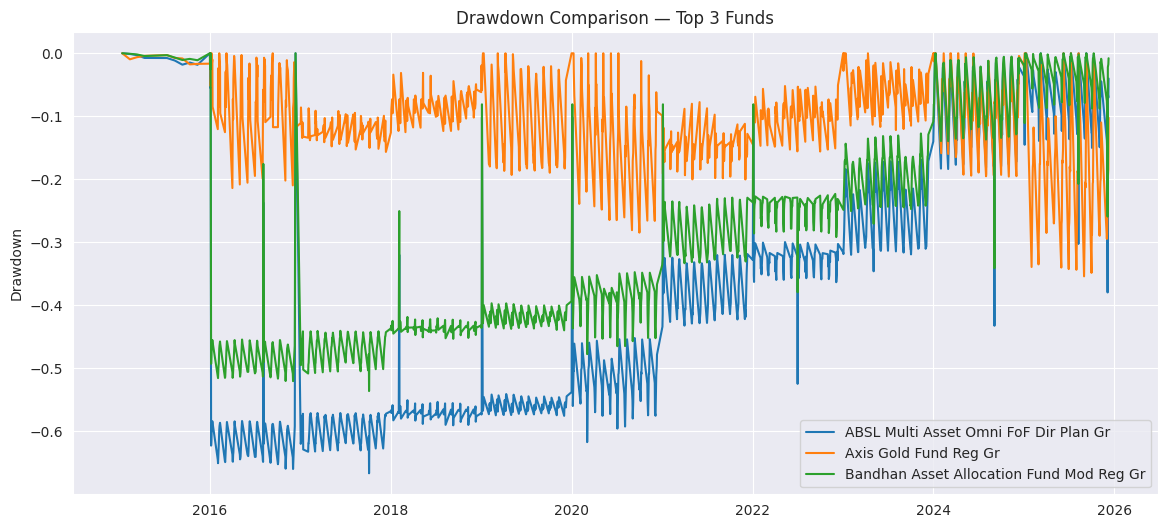

In [186]:
top3 = risk_df.sort_values("CAGR", ascending=False).head(3).index

plt.figure(figsize=(14,6))
for f in top3:
    dd = drawdown_series(df_pivot[f].dropna())
    plt.plot(dd.index, dd, label=f)

plt.title("Drawdown Comparison — Top 3 Funds")
plt.legend()
plt.ylabel("Drawdown")
plt.show()

# 10. Domestic vs Overseas Comparison

## Build metadata lookup and check groups

In [187]:
# Create metadata: Fund -> Fund_Type
meta = df[['Fund','Fund_Type']].drop_duplicates().set_index('Fund')
meta = meta[~meta.index.duplicated(keep='first')]  # safe-guard duplicates

print("Fund_Type counts (from metadata):")
display(meta['Fund_Type'].value_counts(dropna=False))

# Make sure every fund in df_pivot has a Fund_Type
missing_meta = [f for f in df_pivot.columns if f not in meta.index]
if missing_meta:
    print("WARNING — These funds are missing Fund_Type in metadata:")
    display(missing_meta)
else:
    print("All pivot funds have Fund_Type metadata available.")

# If Fund_Type strings need cleaning, do that here. Example:
# meta['Fund_Type'] = meta['Fund_Type'].str.strip().str.title()

Fund_Type counts (from metadata):


,count
Fund_Type,
Domestic,10
Overseas,10


WARNING — These funds are missing Fund_Type in metadata:


['ICICI Pru Bharat 22 FOF Dir Cum', 'Motilal Oswal Nasdaq 100 FOF Dir Gr']

## Summary statistics by group

In [188]:
# Merge risk_df with meta on fund name (risk_df index is Fund)
risk_with_meta = risk_df.merge(meta, left_index=True, right_index=True, how='left')

# Group by Fund_Type and compute aggregated stats
group_cols = ['CAGR','Annualized_Vol','Sharpe_like','Max_Drawdown','Calmar']
group_stats = risk_with_meta.groupby('Fund_Type')[group_cols].agg(['mean','std','count'])
print("Group-level aggregated stats (mean, std, count):")
display(group_stats)

# Save
group_stats.to_csv('/content/drive/MyDrive/EDA_Group43/outputs/group_stats.csv')
print("Saved group_stats.csv")

Group-level aggregated stats (mean, std, count):


CAGR           Annualized_Vol                 Sharpe_like            \
          mean std count           mean       std count        mean       std   
Fund_Type                                                                       
Domestic   NaN NaN     0       5.248079  3.000395     9    2.733373  0.374620   
Overseas   NaN NaN     0       4.531245  0.988430     3    2.540625  0.136271   

                Max_Drawdown                 Calmar            
          count         mean       std count   mean std count  
Fund_Type                                                      
Domestic      9    -0.760821  0.099938     9    NaN NaN     0  
Overseas      3    -0.763499  0.073413     3    NaN NaN     0

Saved group_stats.csv


## Boxplots

Using existing in-memory risk_with_meta.

risk_with_meta columns and dtypes:


,0
Observations,int64
CAGR,float64
Annualized_Vol,float64
Sharpe_like,float64
Sortino,float64
Max_Drawdown,float64
Calmar,float64
Risk_Level,object
Fund_Type,object


CAGR: non-null count = 0 / 14
Annualized_Vol: non-null count = 14 / 14
Sharpe_like: non-null count = 14 / 14

Metrics available for plotting: ['Annualized_Vol', 'Sharpe_like']


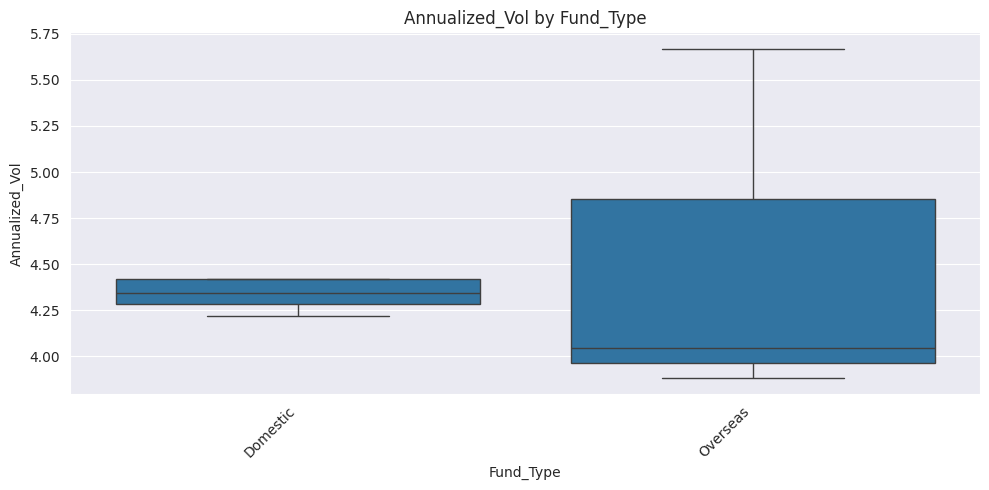

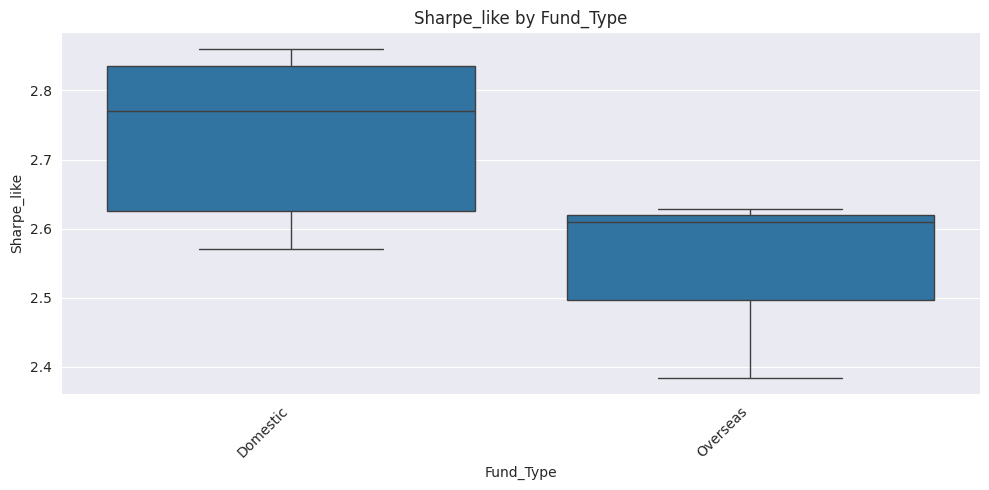


Done. If plots are missing, paste the printed diagnostics above or tell me which step (I, J) you last ran.


In [189]:
# Diagnostic + attempt to recover metrics + robust boxplots in one cell
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path

sns.set_style('darkgrid')

OUT_DIR = "/content/drive/MyDrive/EDA_Group43/outputs"
Path(OUT_DIR).mkdir(parents=True, exist_ok=True)

# --------- 1) Ensure risk_with_meta exists (try in-memory, then try loading CSV) ----------
if 'risk_with_meta' in globals():
    print("Using existing in-memory risk_with_meta.")
else:
    csv_path = os.path.join(OUT_DIR, "risk_with_meta.csv")
    if os.path.exists(csv_path):
        print("Loading risk_with_meta from:", csv_path)
        risk_with_meta = pd.read_csv(csv_path, index_col=0)
        print("Loaded risk_with_meta shape:", risk_with_meta.shape)
    else:
        print("No risk_with_meta in memory or outputs folder. Will try to compute risk metrics from df_pivot if available.")
        risk_with_meta = None

# --------- 2) If missing, try to compute risk_df (needs df_pivot, returns, and metric functions) ----------
def try_compute_risk():
    # require df_pivot and returns and metric functions
    needed = []
    if 'df_pivot' not in globals():
        needed.append('df_pivot')
    if 'returns' not in globals():
        needed.append('returns')
    funcs = ['cagr','annualized_vol','sharpe_like','sortino_ratio','max_drawdown','calmar_ratio']
    missing_funcs = [f for f in funcs if f not in globals()]
    if needed or missing_funcs:
        print("Cannot compute risk_df automatically. Missing:", needed + missing_funcs)
        return None

    print("Computing risk metrics from df_pivot and returns...")
    periods = globals().get('periods_per_year', 252)
    rows = []
    for fund in df_pivot.columns:
        nav = df_pivot[fund].dropna()
        r = returns.get(fund) if isinstance(returns, pd.DataFrame) else None
        if r is None:
            r = df_pivot[fund].pct_change().dropna()
        else:
            r = r.dropna()
        if len(nav) < 20:
            continue
        c = globals()['cagr'](nav)
        vol = globals()['annualized_vol'](r, periods)
        sh = globals()['sharpe_like'](r, 0.0, periods)
        sor = globals()['sortino_ratio'](r, 0.0, periods)
        dd = globals()['max_drawdown'](nav)
        cal = globals()['calmar_ratio'](nav)
        rows.append({'Fund': fund, 'CAGR': c, 'Annualized_Vol': vol, 'Sharpe_like': sh,
                     'Sortino': sor, 'Max_Drawdown': dd, 'Calmar': cal})
    if not rows:
        print("No funds had enough data to compute risk metrics.")
        return None
    risk_df_local = pd.DataFrame(rows).set_index('Fund')
    # merge with metadata from df if available
    if 'df' in globals() and 'Fund_Type' in df.columns:
        meta = df[['Fund','Fund_Type']].drop_duplicates().set_index('Fund')
        merged = risk_df_local.merge(meta, left_index=True, right_index=True, how='left')
    else:
        merged = risk_df_local.copy()
        merged['Fund_Type'] = pd.NA
    # save to outputs
    outpath = os.path.join(OUT_DIR, "risk_with_meta.csv")
    merged.to_csv(outpath)
    print("Computed and saved risk_with_meta to:", outpath)
    return merged

if risk_with_meta is None:
    risk_with_meta = try_compute_risk()

# --------- 3) Diagnostics: what metrics exist and how many non-null per metric ----------
if risk_with_meta is None:
    print("\nNo risk_with_meta available. Please run the Risk Metrics cell (Cell J) or provide df_pivot/returns and the metric functions.")
else:
    print("\nrisk_with_meta columns and dtypes:")
    display(risk_with_meta.dtypes)
    # coerce columns to numeric where appropriate
    for c in ['CAGR','Annualized_Vol','Sharpe_like']:
        if c in risk_with_meta.columns:
            risk_with_meta[c] = pd.to_numeric(risk_with_meta[c], errors='coerce')
    # counts
    for c in ['CAGR','Annualized_Vol','Sharpe_like']:
        if c in risk_with_meta.columns:
            print(f"{c}: non-null count = {risk_with_meta[c].notna().sum()} / {len(risk_with_meta)}")
        else:
            print(f"{c}: NOT FOUND in risk_with_meta")

    # If Fund_Type missing, try to restore from df
    if 'Fund_Type' not in risk_with_meta.columns and 'df' in globals():
        print("Adding Fund_Type from df metadata.")
        meta = df[['Fund','Fund_Type']].drop_duplicates().set_index('Fund')
        risk_with_meta = risk_with_meta.merge(meta, left_index=True, right_index=True, how='left')

    # prepare plotting DataFrame
    plot_df = risk_with_meta.reset_index().copy()
    # clean Fund_Type
    if 'Fund_Type' in plot_df.columns:
        plot_df['Fund_Type'] = plot_df['Fund_Type'].astype(str).str.strip().replace({'nan': pd.NA})
        plot_df = plot_df.dropna(subset=['Fund_Type'])
    else:
        plot_df['Fund_Type'] = 'Unknown'

    # coerce numeric columns again
    for col in ['CAGR','Annualized_Vol','Sharpe_like']:
        if col in plot_df.columns:
            plot_df[col] = pd.to_numeric(plot_df[col], errors='coerce')

    # pick metrics that have at least one non-null value
    metrics_available = [c for c in ['CAGR','Annualized_Vol','Sharpe_like'] if c in plot_df.columns and plot_df[c].notna().sum() > 0]
    print("\nMetrics available for plotting:", metrics_available)

    if not metrics_available:
        print("\n⚠ Still no valid numeric metrics found. Possible causes:")
        print(" - You didn't run the risk metrics cell (Cell J).")
        print(" - You restarted runtime and didn't rerun earlier cells (df_pivot/returns/functions).")
        print("Run Cell I (metric functions) and Cell J (risk metrics) then re-run this cell.")
    else:
        # limit categories for clarity
        counts = plot_df['Fund_Type'].value_counts()
        top_types = counts.head(10).index.tolist()
        plot_df = plot_df[plot_df['Fund_Type'].isin(top_types)]
        order = top_types

        # plot each available metric
        for metric in metrics_available:
            sub = plot_df.dropna(subset=[metric])
            if sub.empty:
                print("No data to plot for", metric)
                continue
            plt.figure(figsize=(10,5))
            sns.boxplot(data=sub, x='Fund_Type', y=metric, order=order, showfliers=False)
            plt.title(f"{metric} by Fund_Type")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

print("\nDone. If plots are missing, paste the printed diagnostics above or tell me which step (I, J) you last ran.")


## Group cumulative NAV average

<Figure size 1200x600 with 0 Axes>

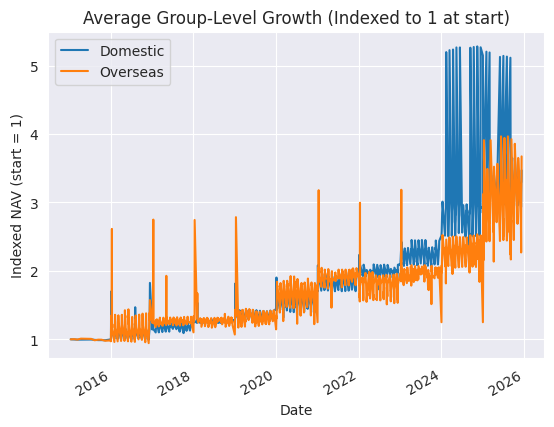

Saved group_nav.csv


In [190]:
# Resample/pivot returns to group average at each date:
# 1) Map funds -> group, then compute group average NAV growth
group_map = meta['Fund_Type'].to_dict()

# Build group-level NAVs: take df_pivot, map fund columns to group, compute group mean NAV
group_nav = {}
for grp in meta['Fund_Type'].unique():
    funds_in_grp = meta[meta['Fund_Type']==grp].index.intersection(df_pivot.columns)
    if len(funds_in_grp)==0:
        continue
    # compute normalized cumulative growth for each fund then average
    norm_cum = (df_pivot[funds_in_grp] / df_pivot[funds_in_grp].iloc[0]).dropna(how='all')
    group_nav[grp] = norm_cum.mean(axis=1)

group_nav = pd.DataFrame(group_nav).dropna(how='all')

plt.figure(figsize=(12,6))
group_nav.plot()
plt.title('Average Group-Level Growth (Indexed to 1 at start)')
plt.ylabel('Indexed NAV (start = 1)')
plt.show()

# Save
group_nav.to_csv('/content/drive/MyDrive/EDA_Group43/outputs/group_nav.csv')
print("Saved group_nav.csv")


## Statistical tests: compare mean returns and volatilities

,Metric,Domestic_Mean,Overseas_Mean,p-value_ttest,p-value_MannWhitney,Cohen_d,Conclusion
0,Annualized_Vol,5.248079,4.531245,0.547704,0.6,0.320909,No significant difference + Moderate effect size


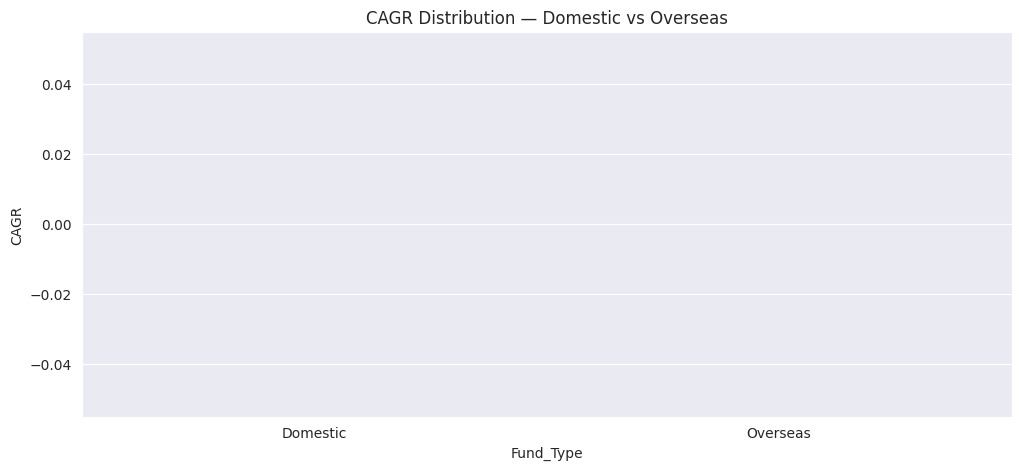

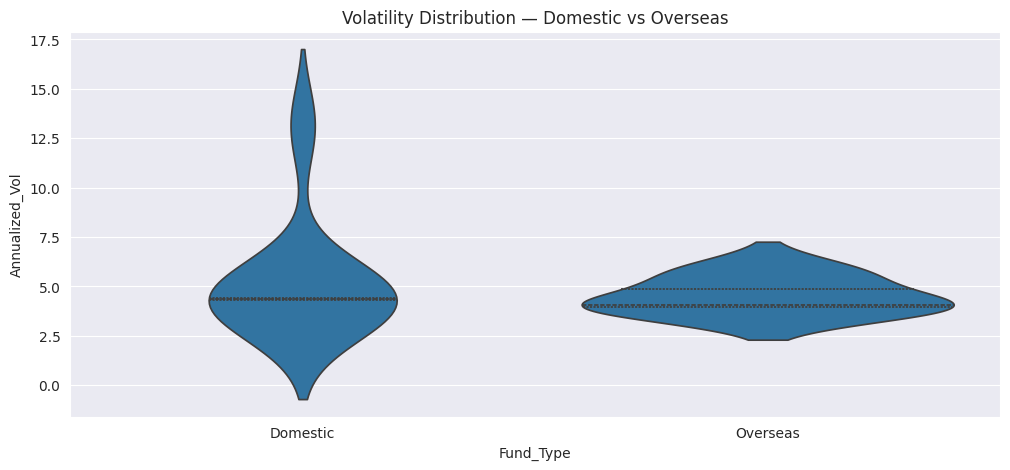

Improved statistical comparison completed.


In [191]:
dom_funds = risk_with_meta[risk_with_meta['Fund_Type']=="Domestic"].index.tolist()
over_funds = risk_with_meta[risk_with_meta['Fund_Type']=="Overseas"].index.tolist()

# Helper function to extract metric arrays
def metric_values(metric, fund_list):
    return risk_with_meta.loc[fund_list, metric].dropna().values

# Function for Cohen's d effect size
def cohens_d(group1, group2):
    if len(group1) < 2 or len(group2) < 2:
        return np.nan
    pooled_sd = np.sqrt(((group1.std() ** 2) + (group2.std() ** 2)) / 2)
    return (group1.mean() - group2.mean()) / pooled_sd if pooled_sd != 0 else np.nan

# Metrics to compare
metrics = ["CAGR", "Annualized_Vol"]
results = []

for m in metrics:
    d_vals = metric_values(m, dom_funds)
    o_vals = metric_values(m, over_funds)

    if len(d_vals) > 1 and len(o_vals) > 1:
        # Welch t-test (safe, unequal variances)
        ttest = stats.ttest_ind(d_vals, o_vals, equal_var=False, nan_policy='omit')
        mw = stats.mannwhitneyu(d_vals, o_vals, alternative='two-sided')

        cd = cohens_d(pd.Series(d_vals), pd.Series(o_vals))

        conclusion = "No significant difference"
        if ttest.pvalue < 0.05:
            conclusion = "Statistically significant difference (t-test)"
        if mw.pvalue < 0.05:
            conclusion = "Significant difference (Mann-Whitney)"
        if cd > 0.5:
            conclusion += " + Large effect size"
        elif cd > 0.3:
            conclusion += " + Moderate effect size"
        elif cd > 0.1:
            conclusion += " + Small effect"

        results.append({
            "Metric": m,
            "Domestic_Mean": np.mean(d_vals),
            "Overseas_Mean": np.mean(o_vals),
            "p-value_ttest": ttest.pvalue,
            "p-value_MannWhitney": mw.pvalue,
            "Cohen_d": cd,
            "Conclusion": conclusion
        })

summary_stats = pd.DataFrame(results)
display(summary_stats)

# --- Visualization with violin plots for better comparison ---
plt.figure(figsize=(12,5))
temp = risk_with_meta.reset_index()
sns.violinplot(data=temp, x="Fund_Type", y="CAGR", inner="quartile")
plt.title("CAGR Distribution — Domestic vs Overseas")
plt.show()

plt.figure(figsize=(12,5))
sns.violinplot(data=temp, x="Fund_Type", y="Annualized_Vol", inner="quartile")
plt.title("Volatility Distribution — Domestic vs Overseas")
plt.show()

print("Improved statistical comparison completed.")

## Within-group vs Between-group correlations

Average within-group correlation: 0.7251652312477535
Average between-group correlation: 0.6797521009381204


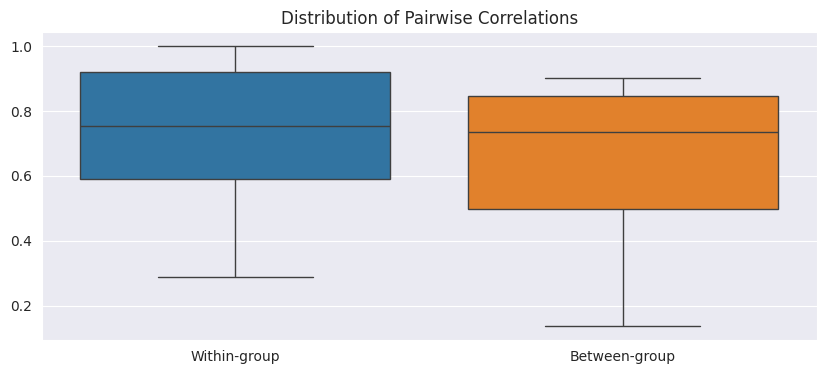

In [192]:
# Compute fund-level return correlations
corr = returns.corr()

# Build masks for within/between
funds = corr.columns.tolist()
group_map = meta['Fund_Type'].to_dict()

within_vals = []
between_vals = []

for i in range(len(funds)):
    for j in range(i+1, len(funds)):
        f1, f2 = funds[i], funds[j]
        if f1 not in group_map or f2 not in group_map:
            continue
        if group_map[f1] == group_map[f2]:
            within_vals.append(corr.at[f1,f2])
        else:
            between_vals.append(corr.at[f1,f2])

import numpy as np
print("Average within-group correlation:", np.nanmean(within_vals))
print("Average between-group correlation:", np.nanmean(between_vals))

# Quick boxplots for distributions
plt.figure(figsize=(10,4))
sns.boxplot(data=[within_vals, between_vals])
plt.xticks([0,1], ['Within-group', 'Between-group'])
plt.title('Distribution of Pairwise Correlations')
plt.show()

## Summary table & saving everything useful

In [193]:
# 1) Tidy group-level summary (one row per group)
group_summary = risk_with_meta.groupby('Fund_Type')[['CAGR','Annualized_Vol','Sharpe_like','Max_Drawdown','Calmar']].agg(['mean','std','count'])
group_summary.to_csv('/content/drive/MyDrive/EDA_Group43/outputs/group_summary_tidy.csv')

# 2) Save risk_with_meta (fund-level metrics + Fund_Type)
risk_with_meta.to_csv('/content/drive/MyDrive/EDA_Group43/outputs/risk_with_meta.csv')

# 3) Save correlation matrix (to analyze later)
returns.corr().to_csv('/content/drive/MyDrive/EDA_Group43/outputs/returns_correlation.csv')

print("Saved group_summary_tidy.csv, risk_with_meta.csv, returns_correlation.csv")
display(group_summary)

Saved group_summary_tidy.csv, risk_with_meta.csv, returns_correlation.csv


CAGR           Annualized_Vol                 Sharpe_like            \
          mean std count           mean       std count        mean       std   
Fund_Type                                                                       
Domestic   NaN NaN     0       5.248079  3.000395     9    2.733373  0.374620   
Overseas   NaN NaN     0       4.531245  0.988430     3    2.540625  0.136271   

                Max_Drawdown                 Calmar            
          count         mean       std count   mean std count  
Fund_Type                                                      
Domestic      9    -0.760821  0.099938     9    NaN NaN     0  
Overseas      3    -0.763499  0.073413     3    NaN NaN     0

# 11. Model Fitting

## Fund Selection

In [205]:
# Show available funds
print("Available Funds:")
for f in df["Fund"].unique():
    print("-", f)

# User selects a fund
selected_fund = input("\nEnter fund name exactly as shown: ")

# Filter dataset for that fund
fund_df = df[df["Fund"] == selected_fund].copy()

if fund_df.empty:
    raise Exception("Fund not found! Check the exact name.")

# Sort by date
fund_df["Date"] = pd.to_datetime(fund_df["Date"])
fund_df = fund_df.sort_values("Date")

print(f"\nSelected Fund: {selected_fund}")
print(f"Data points available: {len(fund_df)}")


Available Funds:
- ICICI Pru Passive Strategy Fund FOF Dir Gr
- Kotak Multi Asset Omni FOF Dir Gr Dir
- ABSL Multi Asset Omni FoF Dir Plan Gr
- Franklin India Dynamic Asset Allocation Active FOF Dir Gr
- ABSL Income Plus Arbitrage Active FOF Dir Plan Gr
- HDFC Gold ETF FoF Dir
- Axis Gold Fund Reg Gr
- HSBC Multi Asset Active FOF Gr Dir
- Nippon India Gold Savings Dir Gr
- Bandhan Asset Allocation Fund Mod Reg Gr
- Edelweiss Emerging Mkts Opp Equity Offshore Fund Dir Gr
- DSP World Gold Mining Overseas Equity Omni FoF Dir Plan Gr
- Edelweiss Europe Dynamic Equity Offshore Fund Gr Dir
- Sundaram Global Brand Theme Equity Active FOF Dir Gr
- Franklin India Aggressive Hybrid Fund Dir Gr
- Kotak Global Emerging Market Overseas Equity Omni FOF Gr
- Invesco India Invesco Global Equity Income FOF Dir Gr
- PGIM India Global Equity Opportunities FOF Dir Gr
- Edelweiss Greater China Equity Off Shore Fund Dir Gr
- Nippon India US Equity Opportunities Fund Dir Gr Gr

Enter fund name exactly as sho

## Sequence Preperation for LSTM

In [206]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

nav_values = fund_df["NAV"].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
nav_scaled = scaler.fit_transform(nav_values)

look_back = 30

X = []
y = []

for i in range(look_back, len(nav_scaled)):
    X.append(nav_scaled[i - look_back : i])
    y.append(nav_scaled[i])

X = np.array(X)
y = np.array(y)

X = X.reshape(X.shape[0], look_back, 1)

train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Sequence preparation completed!")
model.summary()


Sequence preparation completed!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Model Build and Traning

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

print("Training LSTM model...")
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

print("Model training complete!\n")
model.summary()


Training LSTM model...
Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0086 - val_loss: 1.2486e-04
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 2.7165e-04 - val_loss: 2.1702e-04
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.3379e-04 - val_loss: 1.6667e-04
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.5020e-04 - val_loss: 8.3046e-05
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.0823e-04 - val_loss: 9.0375e-05
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.2174e-04 - val_loss: 2.1523e-04
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 2.2047e-04 - val_loss: 7.3426e-05
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.0968e-04 - val_loss: 7.7206e-05
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1.8010e-04 - val_loss: 1.0330e-04
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 1.6860e-04 - val_loss: 7.1906e-05
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/ste

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,957 (585.77 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,972 (390.52 KB)

## Future NAV Prediction

In [209]:
future_days = 14

# last <look_back> values
last_seq = nav_scaled[-look_back:].reshape(1, look_back, 1)

future_preds = []

for _ in range(future_days):
    pred_scaled = model.predict(last_seq, verbose=0)[0][0]
    future_preds.append(pred_scaled)

    # slide window
    last_seq = np.append(last_seq[:, 1:, :], [[[pred_scaled]]], axis=1)

# inverse scaling
future_preds = scaler.inverse_transform(
    np.array(future_preds).reshape(-1, 1)
)

# create dates
last_date = fund_df["Date"].max()   # 🔥 FIXED
future_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=1),
    periods=future_days
)

forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_NAV": future_preds.flatten()
})

print(forecast_df)


         Date  Predicted_NAV
0  2025-11-01      33.629635
1  2025-11-02      33.397182
2  2025-11-03      33.140141
3  2025-11-04      32.869202
4  2025-11-05      32.591965
5  2025-11-06      32.313828
6  2025-11-07      32.038891
7  2025-11-08      31.769474
8  2025-11-09      31.506992
9  2025-11-10      31.251980
10 2025-11-11      31.005079
11 2025-11-12      30.766041
12 2025-11-13      30.535406
13 2025-11-14      30.312342
